# テストの続き

In [2]:
import pandas as pd
import numpy as np

#前処理済みのデータを持ってくる
df = pd.read_csv('./data/adult/adult_treated.csv', header=0,)

X = df.iloc[:,:-1]
#pd.to_csvで行数が１列目に入るので削除
X = X.drop('Unnamed: 0', axis=1)
y = df.iloc[:,[-1]]

#check the shape
print('----------------------------------------------------------------------------------------')
print('Raw shape: (%i,%i)' %df.shape)
print('X shape: (%i,%i)' %X.shape)
print('y shape: (%i,%i)' %y.shape)
print('----------------------------------------------------------------------------------------')
print(X.dtypes)
print('----------------------------------------------------------------------------------------')
print('Check the null count of the target variable: %i' % y.isnull().sum())
print('----------------------------------------------------------------------------------------')
X.join(y).head()

----------------------------------------------------------------------------------------
Raw shape: (32561,17)
X shape: (32561,15)
y shape: (32561,1)
----------------------------------------------------------------------------------------
Age                                  float64
Fnlwgt                               float64
Education_num                        float64
Capital_Gain                         float64
Capital_Loss                         float64
Hours_Per_Week                       float64
Workclass_Self-emp-not-inc           float64
Marital_Status_Married-civ-spouse    float64
Occupation_Exec-managerial           float64
Occupation_Farming-fishing           float64
Occupation_Other-service             float64
Occupation_Prof-specialty            float64
Occupation_Tech-support              float64
Relationship_Wife                    float64
Sex_Male                             float64
dtype: object
------------------------------------------------------------------------

,Age,Fnlwgt,Education_num,Capital_Gain,Capital_Loss,Hours_Per_Week,Workclass_Self-emp-not-inc,Marital_Status_Married-civ-spouse,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Other-service,Occupation_Prof-specialty,Occupation_Tech-support,Relationship_Wife,Sex_Male,Income
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0


In [3]:
import pandas as pd

# import sample data
# Loan screening data for classification 
df_s = pd.read_csv('./data/adult/adult_test_treated.csv', header=0,)
X_s = df_s.iloc[:,:-1]
X_s = X_s.drop('Unnamed: 0', axis=1)
y_s = df_s.iloc[:,[-1]]

print('----------------------------------------------------------------------------------------')
print('Raw shape: (%i,%i)' %df_s.shape)
print('X_s shape: (%i,%i)' %X_s.shape)
print('y_s shape: (%i,%i)' %y_s.shape)
print(X_s.dtypes)

----------------------------------------------------------------------------------------
Raw shape: (16281,17)
X_s shape: (16281,15)
y_s shape: (16281,1)
Age                                  float64
Fnlwgt                               float64
Education_num                        float64
Capital_Gain                         float64
Capital_Loss                         float64
Hours_Per_Week                       float64
Workclass_Self-emp-not-inc           float64
Marital_Status_Married-civ-spouse    float64
Occupation_Exec-managerial           float64
Occupation_Farming-fishing           float64
Occupation_Other-service             float64
Occupation_Prof-specialty            float64
Occupation_Tech-support              float64
Relationship_Wife                    float64
Sex_Male                             float64
dtype: object


In [4]:
# import basice apis
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,r2_score

from skgarden.mondrian.ensemble import MondrianForestClassifier


# data Standardization
scaler = StandardScaler()
scaler.fit(X)
X_scl = scaler.transform(X)
X_s_scl = scaler.transform(X_s)

#set learning machine
lgr = LogisticRegression()
svc = LinearSVC()
rfc = RandomForestClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
mfc = MondrianForestClassifier()


learner_list = [lgr, svc, rfc, gbc, mfc]
learner_name = ['LogisticRegression', 'LinearSVC', 'RandomForest','GradientBoosting', 'MondrianForest' ]
result_name = ['lgr', 'svc', 'rfc','gbr', 'mfc']


In [5]:
#各モデルのデータ数に対する計算速度を計測
import time
def calc_function(f, args):
    start = time.time()
    result = f(*args)
    end = time.time()
    return end-start

#全データ数をNを格納


def calc_time_array_100(X_use, y_use, larener):
    i = 0
    i_list = []
    time_list = []
    N = X_use.shape[0]
    while i < N:
        i += 100
        X_data = X_use[:i, :]    #データ数を大きくしてく
        y_data = y_use[:i]
        calc_time = calc_function(larener.fit,(X_data,y_data.as_matrix().ravel()) )
        i_list.append(i)
        time_list.append(calc_time)
    i_array = np.array(i_list)
    time_array = np.array(time_list)
    return i_array, time_array


In [ ]:
result_rfc = calc_time_array_100(X_scl, y, rfc)
print('end')

end


In [ ]:
result_gbc = calc_time_array_100(X_scl, y, gbc)
print('end')

In [ ]:
result_mfc = calc_time_array_100(X_scl, y, mfc)
print('end')

In [ ]:
result_svc = calc_time_array_100(X_scl, y, svc)
print('end')

In [ ]:
result_lgr = calc_time_array_100(X_scl, y, lgr)
print('end')

In [ ]:
#partial_fitを繰り返すと同じのに何回のpartial_fitするので、ちゃんとリセットするかチェック

mfc = MondrianForestClassifier()
mfc.partial_fit(X_scl[:10000,:], y.as_matrix().ravel()[:10000])
a_score = accuracy_score(y_s.as_matrix().ravel(), mfc.predict(X_s_scl))
print(a_score)

mfc = MondrianForestClassifier()   
#頭に#つけたりして試すとaccuracyscoreの落ち具合でリセットされてるのが分かる
mfc.partial_fit(X_scl[:10,:], y.as_matrix().ravel()[:10])
a_score2 = accuracy_score(y_s.as_matrix().ravel(), mfc.predict(X_s_scl))
print(a_score2)

In [ ]:
#partial_fit result

i = 0
i_list = []
time_list = []
N = X.shape[0]
while i < N:
    i += 100
    X_data = X_scl[:i, :]    #データ数を大きくしてく
    y_data = y[:i]
    calc_time = calc_function(mfc.partial_fit,(X_data,y_data.as_matrix().ravel()) )
    i_list.append(i)
    time_list.append(calc_time)
    mfc = MondrianForestClassifier()  
    #まずはそもそもpartial_fitの時間を知りたいのでリセット
i_array = np.array(i_list)
time_array = np.array(time_list)

result_mfc_p = (i_array, time_array)
print('end')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot(result, name):
    x,y = result
    plt.plot(x, y, label=name)
result_plot(result_rfc, 'RandomForest')

plt.title('calculationtime of each laerner')
plt.xlabel('number of data(number)')
plt.ylabel('calculationtime(second)')
#凡例の表示
plt.legend()
# プロット表示(設定の反映)
plt.show()

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot(result, name):
    x,y = result
    plt.plot(x, y, label=name)
result_plot(result_rfc, 'RandomForest')
result_plot(result_gbc, 'GradientBoosting')
result_plot(result_mfc, 'Mondrianfit')
result_plot(result_lgr, 'LogsticRegression')
result_plot(result_mfc_p, 'Mondrianpartial_fit')
result_plot(result_svc, 'LinearSVC')

plt.title('calculationtime of each laerner')
plt.xlabel('number of data(number)')
plt.ylabel('calculationtime(second)')
#凡例の表示
plt.legend()
# プロット表示(設定の反映)
plt.savefig('calculationtime of each laerner', dpi=500)
plt.show()


NameError: name 'result_rfc' is not defined

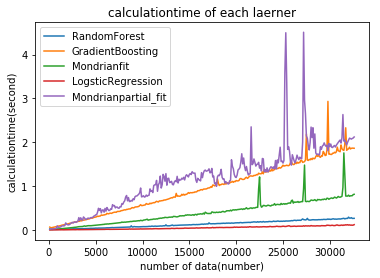

In [85]:
#%matplotlib inline
import matplotlib.pyplot as plt

def result_plot(result, name):
    x,y = result
    plt.plot(x, y, label=name)
result_plot(result_rfc, 'RandomForest')
result_plot(result_gbc, 'GradientBoosting')
result_plot(result_mfc, 'Mondrianfit')
result_plot(result_lgr, 'LogsticRegression')
result_plot(result_mfc_p, 'Mondrianpartial_fit')

plt.title('calculationtime of each laerner')
plt.xlabel('number of data(number)')
plt.ylabel('calculationtime(second)')
#凡例の表示
plt.legend()
# プロット表示(設定の反映)
plt.savefig('calculationtime of each laerner2.png',dpi=500)
plt.show()
